In [1]:
from keras import layers, models

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation = 'relu'))
model.add(layers.Dense(5, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                108180    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 108,605
Trainable params: 108,605
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras import callbacks

callbacks_list = [callbacks.ReduceLROnPlateau(
                            monitor = 'val_loss',
                            factor = 0.1,
                            patience = 3,
                            verbose = 1),
                       callbacks.EarlyStopping(
                            monitor = 'val_loss',
                            patience = 8,
                            restore_best_weights = True,
                            verbose = 1)]

In [9]:
from keras import optimizers

model.compile(loss = 'mean_squared_error',
                     optimizer = optimizers.SGD(lr = 1e-4, momentum=0.9),
                     metrics = ['accuracy'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    color_mode = 'grayscale',
    batch_size = 1,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (28, 28),
    color_mode = 'grayscale',
    batch_size = 1,
    class_mode = 'categorical')

Found 16000 images belonging to 5 classes.
Found 4000 images belonging to 5 classes.


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 16000,
    epochs = 200,
    validation_data = validation_generator, 
    validation_steps = 4000,
    callbacks = callbacks_list)

Epoch 1/200
16000/16000 [==============================] - 20s 1ms/step - loss: 0.0301 - accuracy: 0.9327 - val_loss: 5.9933e-04 - val_accuracy: 0.9358
Epoch 2/200
16000/16000 [==============================] - 21s 1ms/step - loss: 0.0248 - accuracy: 0.9422 - val_loss: 0.0119 - val_accuracy: 0.9408
Epoch 3/200
16000/16000 [==============================] - 22s 1ms/step - loss: 0.0221 - accuracy: 0.9473 - val_loss: 0.0412 - val_accuracy: 0.9433
Epoch 4/200
16000/16000 [==============================] - 2961s 185ms/step - loss: 0.0202 - accuracy: 0.9506 - val_loss: 0.0182 - val_accuracy: 0.9470

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 5/200
16000/16000 [==============================] - 1750s 109ms/step - loss: 0.0192 - accuracy: 0.9526 - val_loss: 0.0242 - val_accuracy: 0.9473
Epoch 6/200
16000/16000 [==============================] - 21s 1ms/step - loss: 0.0190 - accuracy: 0.9530 - val_loss: 6.2045e-04 - val_accuracy: 0.9475
Epoch 7/200
160

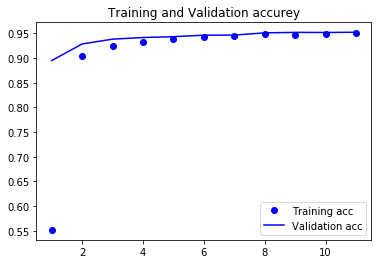

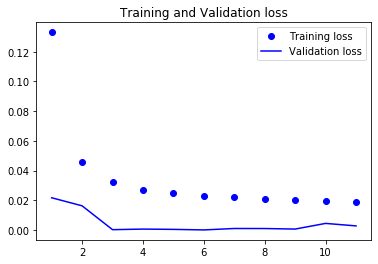

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accurey')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [20]:
import os
from keras.preprocessing import image
import numpy as np

predict_dir = "/Volumes/ADATA HD330/hw2/02468"
predict_list = os.listdir(predict_dir)
#print(predict_list)
predict_list.sort(key=lambda x:int(x[:-4]))
f = open('Answer.txt', 'w', encoding = 'UTF-8')
n=0
for img_name in predict_list:
    img = os.path.join(predict_dir, img_name)
    img = image.load_img(img, target_size=(28, 28), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.
    #img = preprocess_input(img)
    pred = model.predict_classes(img)
    #print(pred)
    out = img_name[:-4] + ' ' + str(pred[0]*2) + '\n'
    f.write(out)
    n = n+1

f.close()
print('Finish', n)

Finish 5000


In [7]:
import os
from keras.preprocessing import image
import numpy as np

data_dir = "./dataset2/validation"
#data_dir = "./training"
# predict_dir_list = os.listdir(predict_dir)
# predict_dir_list.sort(key=lambda x:int(x))
predict_matrix = np.zeros((5, 5), dtype=int)
n = 0

for i in range(0, 10, 2):
    predict_dir = os.path.join(data_dir, str(i))
    predict_list = os.listdir(predict_dir)
    predict_list.sort(key=lambda x:int(x[:-4]))
    for imgn in predict_list:
        img = os.path.join(predict_dir, imgn)
        img = image.load_img(img, target_size=(28, 28), color_mode='grayscale')
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img/255.
        pred = model.predict_classes(img)
        j = i/2
#         if int(j) == 4 and pred == 1:
#             img = os.path.join(predict_dir, imgn)
#             img = image.load_img(img, target_size=(28, 28), color_mode='grayscale')
#             print(img.size)
#             plt.imshow(img)
#             plt.show()
#             break
        predict_matrix[int(j)][pred] += 1
        n += 1
        
print(predict_matrix)
s = 0
for i in range(5):
    s += predict_matrix[i][i] 
    
print("Acc = ", s/n)
# for img in predict_list:
#     img = os.path.join(predict_dir, img)
#     img = image.load_img(img, target_size=(28, 28), color_mode='grayscale')
#     img = image.img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = img/255.
#     #print(img)
#     #img = preprocess_input(img)
#     pred = model.predict_classes(img)
#     if pred == 0:
#         a += 1
#     #print(pred)
#     #break

# print(a/len(predict_list))
# print(a)

[[765   8   1   9  17]
 [  9 695  25  30  41]
 [  4   6 754  10  26]
 [ 11  19  12 747  11]
 [ 20  20  21   9 730]]
Acc =  0.92275


In [23]:
layer_output = model.model.get_layer("conv2d_1").output
print(layer_output)

Tensor("conv2d_1/Relu:0", shape=(None, 26, 26, 32), dtype=float32)
